# Chapter 1

### Topics:  
- What is Machine Learning?
- Why Use Machine Learning?
- Types of Machine Learning Systems
- Main Challenges of Machine Learning
- Testing and Validating

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import sklearn
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## What is Machine Learning?
[Machine Learning is the] field of study that gives computers the ability to learn
without being explicitly programmed.

—Arthur Samuel, 1959

A computer program is said to learn from experience E with respect to some task T
and some performance measure P, if its performance on T, as measured by P, improves
with experience E.

—Tom Mitchell, 1997

## Why Use Machine Learning?
To summarize, Machine Learning is great for:

- Problems for which existing solutions require a lot of hand-tuning or long lists of
rules: one Machine Learning algorithm can often simplify code and perform better.  
- Complex problems for which there is no good solution at all using a traditional
approach: the best Machine Learning techniques can find a solution.  
- Fluctuating environments: a Machine Learning system can adapt to new data.  
- Getting insights about complex problems and large amounts of data.  

## Types of Machine Learning Systems

There are so many different types of Machine Learning systems that it is useful to
classify them in broad categories based on:

- Whether or not they are trained with human supervision (supervised, unsupervised,
semisupervised, and Reinforcement Learning)  
- Whether or not they can learn incrementally on the fly (online versus batch
learning)  
- Whether they work by simply comparing new data points to known data points,
or instead detect patterns in the training data and build a predictive model, much
like scientists do (instance-based versus model-based learning)  

## Main Challenges of Machine Learning

* Insufficient Quantity of Training Data
* Nonrepresentative Training Data
* Poor-Quality Data
* Irrelevant Features
* Overfitting the Training Data
* Underfitting the Training Data

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [6]:
# Load the data
oecd_bli = pd.read_csv(".\datasets\lifesat\oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(".\datasets\lifesat\gdp_per_capita.csv",thousands=',',delimiter='\t',
encoding='latin1', na_values="n/a")

In [7]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
# print(type(X))
X.view()

array([[  9054.914],
       [  9437.372],
       [ 12239.894],
       [ 12495.334],
       [ 15991.736],
       [ 17288.083],
       [ 18064.288],
       [ 19121.592],
       [ 20732.482],
       [ 25864.721],
       [ 27195.197],
       [ 29866.581],
       [ 32485.545],
       [ 35343.336],
       [ 37044.891],
       [ 37675.006],
       [ 40106.632],
       [ 40996.511],
       [ 41973.988],
       [ 43331.961],
       [ 43603.115],
       [ 43724.031],
       [ 43770.688],
       [ 49866.266],
       [ 50854.583],
       [ 50961.865],
       [ 51350.744],
       [ 52114.165],
       [ 55805.204]])

In [8]:
# Use ggplot style for matplotlib
plt.style.use('seaborn-whitegrid')

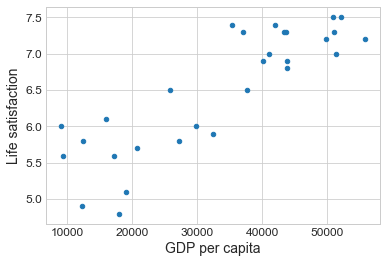

In [9]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()


In [10]:
# Select a linear model

# sklearn does not automatically import its subpackages. 
# If you only imported via: import sklearn, then it wont work. 
# import with import sklearn.<subpackage> instead.

from sklearn import linear_model
lin_reg_model = sklearn.linear_model.LinearRegression()
# Train the model
lin_reg_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(lin_reg_model.predict(X_new)) # outputs [[ 5.96242338]]

[[ 5.96242338]]


In [12]:
message = 'Itercept + Coef1: '
print(message, lin_reg_model.intercept_, lin_reg_model.coef_)

Itercept + Coef1:  [ 4.8530528] [[  4.91154459e-05]]


In [13]:
# KNN
clf = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)